### Task 1 & 2 – Dataset Prep + Prompt Engineering

In [ ]:
## 1.Imports & Dataset Loading

from datasets import load_dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

c:\Users\Agrim Gupta\Desktop\Fallon Studio\sudio_fallon_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
## Load US Airline Sentiment dataset from Hugging Face

dataset = load_dataset("tweet_eval", "sentiment")

c:\Users\Agrim Gupta\Desktop\Fallon Studio\sudio_fallon_venv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Agrim Gupta\.cache\huggingface\hub\datasets--tweet_eval. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating validation split: 100%|██████████| 2000/2000 [00:00<00:00, 144454.34 examples/s

In [ ]:
## 2.Preprocessing

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   
    text = re.sub(r"@\w+", "", text)             
    text = re.sub(r"#\w+", "", text)            
    text = re.sub(r"[^a-z0-9\s]", "", text)    
    return text.strip()

In [5]:
## Apply cleaning:

dataset = dataset.map(lambda x: {"text": clean_tweet(x["text"])})

Map: 100%|██████████| 2000/2000 [00:00<00:00, 10849.70 examples/s]


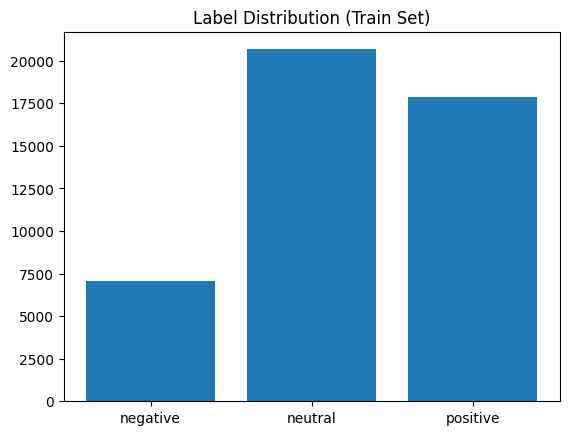

In [ ]:
## 3.Label Distribution

labels = dataset["train"]["label"]
label_names = dataset["train"].features["label"].names
counts = pd.Series(labels).value_counts().sort_index()

plt.bar(label_names, counts)
plt.title("Label Distribution (Train Set)")
plt.show()

In [ ]:
## 4.Prompt Engineering:

def prompt_direct(tweet):
    return f"Classify the sentiment of this tweet as Positive, Neutral, or Negative:\n\nTweet: {tweet}"

def prompt_fewshot(tweet):
    examples = """
Tweet: "I love flying with Delta, they provide great service !" -> Positive
Tweet: "The flight was delayed and crew was very rude." -> Negative
Tweet: "The plane was okay, nothing special." -> Neutral
"""
    return f"{examples}\nClassify the following tweet:\nTweet: {tweet}"

def prompt_chain_of_thought(tweet):
    return f"Analyze the tweet step by step. First decide if the tone is favorable, unfavorable, or neutral. Then provide the final label.\n\nTweet: {tweet}"

In [ ]:
sample_tweets = [
    "I loved the crew, they were very friendly!",
    "The flight was delayed by 3 hours.",
    "It was just okay, nothing special."
]

print("\n Prompt Examples")
for tweet in sample_tweets:
    print("\nTWEET:", tweet)
    print("Direct Prompt:\n", prompt_direct(tweet))
    print("Few-Shot Prompt:\n", prompt_fewshot(tweet))
    print("Chain-of-Thought Prompt:\n", prompt_chain_of_thought(tweet))


 Prompt Examples

TWEET: I love the crew, they were very friendly!
Direct Prompt:
 Classify the sentiment of this tweet as Positive, Neutral, or Negative:

Tweet: I love the crew, they were very friendly!
Few-Shot Prompt:
 
Tweet: "I love flying with Delta, they provide great service !" → Positive
Tweet: "The flight was delayed and crew was very rude." → Negative
Tweet: "The plane was okay, nothing special." → Neutral

Classify the following tweet:
Tweet: I love the crew, they were very friendly!
Chain-of-Thought Prompt:
 Analyze the tweet step by step. First decide if the tone is favorable, unfavorable, or neutral. Then provide the final label.

Tweet: I love the crew, they were very friendly!

TWEET: The flight was delayed by 3 hours.
Direct Prompt:
 Classify the sentiment of this tweet as Positive, Neutral, or Negative:

Tweet: The flight was delayed by 3 hours.
Few-Shot Prompt:
 
Tweet: "I love flying with Delta, they provide great service !" → Positive
Tweet: "The flight was dela